In [1]:
import csv
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
RANDOM_SEED = 42
import psutil
import os

# LSTM
Specify each path

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.keras'

Set number of classifications

In [3]:
NUM_CLASSES = 6

# input length

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# Load learning data

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [8]:
#Remove BUG

# use_lstm = True
# model = None

# if use_lstm:
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.InputLayer(shape=(TIME_STEPS * DIMENSION, )),
#         tf.keras.layers.Reshape((TIME_STEPS, DIMENSION)), 
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(10, activation='relu'),
#         tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#     ])
# else:
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.InputLayer(shape=(TIME_STEPS * DIMENSION, )),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(24, activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(10, activation='relu'),
#         tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#     ])

use_lstm = True
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(TIME_STEPS, DIMENSION)),  # Use Input layer to define the shape
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(TIME_STEPS * DIMENSION,)),  # Use Input layer to define the shape
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 16, 2)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 16)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,452 (5.67 KB)

 Trainable params: 1,452 (5.67 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early termination
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

Epoch 1/1000
42/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1538 - loss: 1.7866 
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1577 - loss: 1.7852 - val_accuracy: 0.2330 - val_loss: 1.7458
Epoch 2/1000
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.7317
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2455 - loss: 1.7275 - val_accuracy: 0.2884 - val_loss: 1.6071
Epoch 3/1000
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2942 - loss: 1.6239
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2977 - loss: 1.6222 - val_accuracy: 0.4622 - val_loss: 1.5471
Epoch 4/1000
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3562 - loss: 1.5892
Epoch 4: saving model to model/point_history_clas

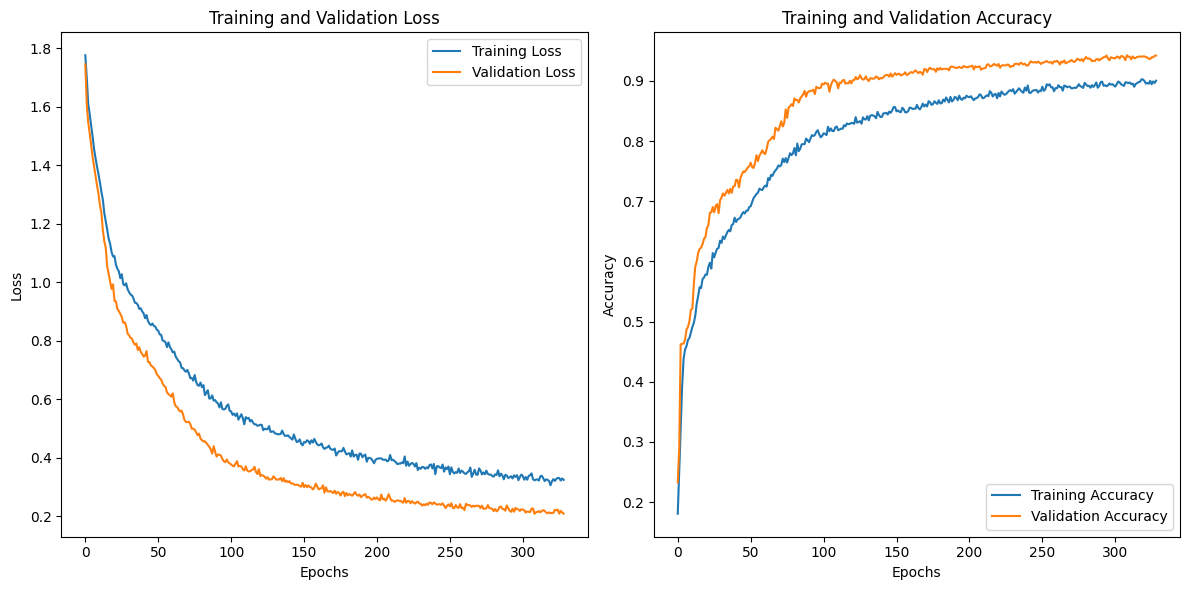

In [12]:
# Reshape your data to the correct shape
X_train = X_train.reshape(-1, 16, 2)
X_test = X_test.reshape(-1, 16, 2)

start_time = time.time()

# Get current process memory usage
process = psutil.Process(os.getpid())

# Measure memory usage before training LSTM
memory_before = process.memory_info().rss / 1024 ** 2  # Convert to MB



# Now fit the model
history=model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

end_time = time.time()
training_time_lstm = end_time - start_time
print(f"LSTM Training Time: {training_time_lstm:.2f} seconds")

# Measure memory usage after training LSTM
memory_after = process.memory_info().rss / 1024 ** 2  # Convert to MB
memory_usage_lstm = memory_after - memory_before
print(f"LSTM Memory Usage: {memory_usage_lstm:.2f} MB")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[7.4584382e-13 5.2695680e-07 5.0661799e-02 9.0462732e-01 6.2391476e-04
 4.4086512e-02]
3


# confusion matrix

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step


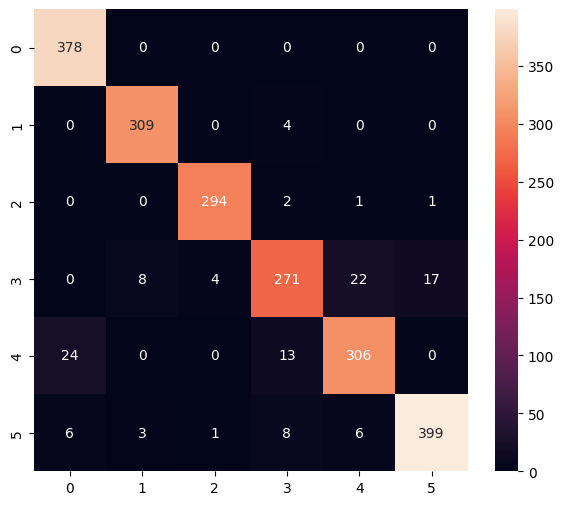

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       378
           1       0.97      0.99      0.98       313
           2       0.98      0.99      0.98       298
           3       0.91      0.84      0.87       322
           4       0.91      0.89      0.90       343
           5       0.96      0.94      0.95       423

    accuracy                           0.94      2077
   macro avg       0.94      0.94      0.94      2077
weighted avg       0.94      0.94      0.94      2077



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-LiteConvert to model for

In [16]:
# Save as a model for inference only
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# Create the converter from the Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable optimizations for quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Enable resource variables to handle operations like TensorListReserve
converter.experimental_enable_resource_variables = True

# Enable select TensorFlow ops for compatibility with LSTM operations
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# Disable lowering of tensor list operations
converter._experimental_lower_tensor_list_ops = False

# Perform the conversion
tflite_quantized_model = converter.convert()

# Save the converted TFLite model
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)


INFO:tensorflow:Assets written to: C:\Users\Jhevish\AppData\Local\Temp\tmp9wjfsuz2\assets


INFO:tensorflow:Assets written to: C:\Users\Jhevish\AppData\Local\Temp\tmp9wjfsuz2\assets


Saved artifact at 'C:\Users\Jhevish\AppData\Local\Temp\tmp9wjfsuz2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16, 2), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1421951069248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1421951072592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1421951070480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1421950966016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1421950968304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1421950970944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1421950973232: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Reasoning test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get input/output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 16,  2]), 'shape_signature': array([-1, 16,  2]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 500 μs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.2973119e-13 5.6382493e-07 4.9188167e-02 9.0627068e-01 6.2457955e-04
 4.3915998e-02]
3
